# Supplemental Materials Figure 2: 
**Author:** Juan Bolanos  
**Date:** 2025-02-27  
**Description:** This notebook generates Supplemental Metrial Figure 2,Bootstrap Grouped Barcharts  from the [BEAST Transition Counts](https://www.beast2.org/2021/01/20/counting-state-transitions.html)
output.<br>
**Files Needed**: 
* [BEAST_Transition_Counter_Output.txt](https://zenodo.org/records/14946855/files/BEAST_Transition_Counter_Output.txt?download=1)



Find all date here:
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.14946855.svg)](https://doi.org/10.5281/zenodo.14946855)


### Step 1: Install Libraries

In [29]:
# Function to install missing packages
install_if_missing <- function(packages) {
    to_install <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(to_install)) install.packages(to_install, dependencies = TRUE)
}

# List of required libraries
required_packages <- c("ggplot2", "tidyr", "dplyr", "glue", "tidyverse")

# Install missing packages
install_if_missing(required_packages)

# Load libraries
library(ggplot2)
library(tidyr)
library(dplyr)
library(glue)
library(tidyverse)

### Step 2: Read BEAST.log file 


In [32]:
# Load the metadata file
Combined <- "/Users/juanbolanos/Desktop/Phylogenetisc_Paper/Dornburg-Review/Final-Data/scripts/Transition_Counter_Plots_AlexShared/Distribution_Plots_And_LTT_CombinedScript/input/All_Data_Grouped_COMBINED-Transition-Count-03-26-2024-13-44.txt"  

### Step 3: Parse  BEAST transition counter file

In [35]:
# Function to extract histogram data from a file
extract_histogram_data <- function(file_path, file_label) {
  library(tidyverse)
  lines <- readLines(file_path)
  
  # Locate "Histogram" section start
  hist_start <- grep("^Histogram", lines)
  
  # Identify the next section (e.g., "Lineages through time") to determine the end
  next_section <- grep("^[A-Za-z ]+", lines[(hist_start + 1):length(lines)])
  
  # Determine end of histogram section
  if (length(next_section) > 0) {
    hist_end <- hist_start + next_section[1] - 2  # Adjust index to exclude the next section header
  } else {
    hist_end <- length(lines)  # If no next section, assume rest is the histogram
  }
  
  endofsection <- hist_end + hist_start
  
  # Read histogram data
  hist_data <- read.table(text = lines[(hist_start + 1):endofsection], 
                          header = TRUE, sep = "\t", check.names = FALSE, fill = TRUE)
  
  # Remove blank columns
  hist_data <- hist_data %>% select(where(~ !all(is.na(.))))
  
  # Convert to long format
  hist_long <- hist_data %>%
    pivot_longer(cols = -Transition, names_to = "Value", values_to = "Frequency") %>%
    mutate(File = file_label,  # Use provided label instead of file name
           Value = as.numeric(Value), 
           Frequency = as.numeric(Frequency)) %>% 
    filter(Frequency > 0)  # Remove zero values to avoid log issues
  
  return(hist_long)
}



### Step 4: Plot
For this plot, I am using the same  BEAST transition counter file three times.  It is just to show the concept of the script.<br>
Ideally there would be **n** number of  BEAST transition counter files. 

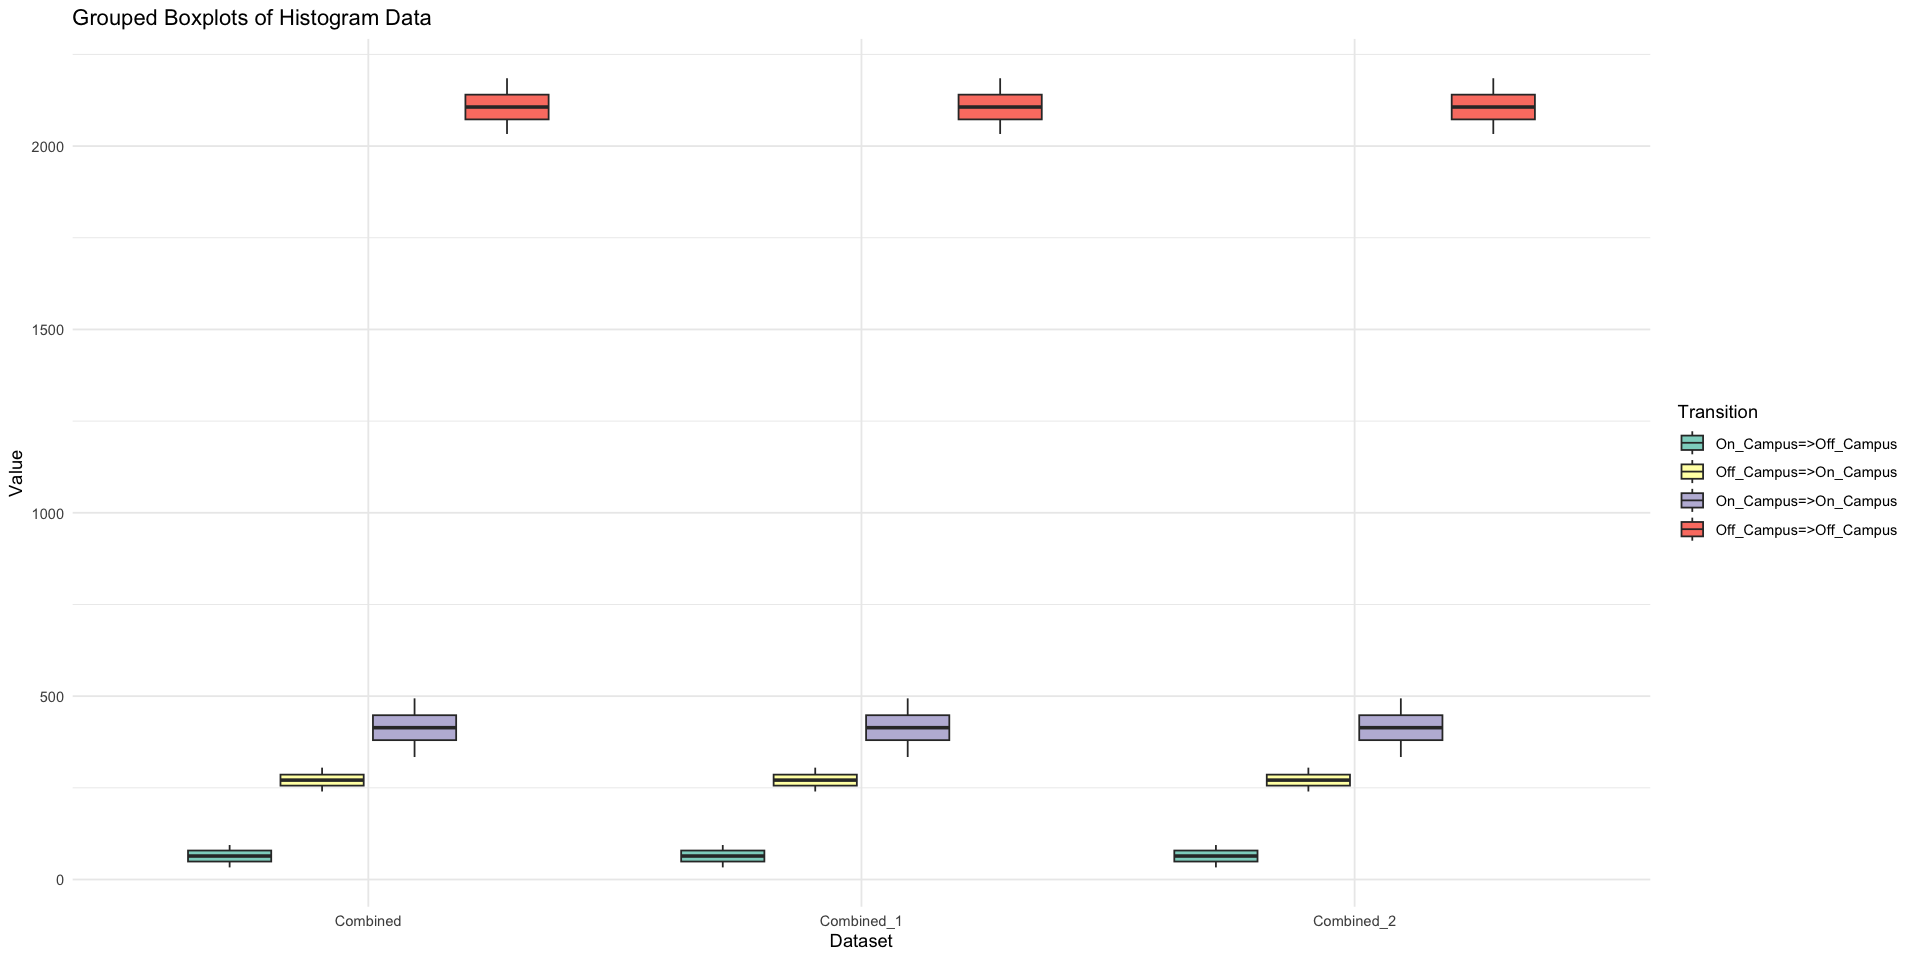

In [27]:
# List your files and custom labels
files <- c(Combined,Combined,Combined)  # Replace with actual paths
file_labels <- c('Combined','Combined_1','Combined_2')  # Custom labels


# Extract and combine data from all files
all_hist_data <- map2_dfr(files, file_labels, extract_histogram_data)


# Manually specify order of groups (Transitions) within each dataset
all_hist_data <- all_hist_data %>%
  mutate(Transition = factor(Transition, levels = c("On_Campus=>Off_Campus", 
                                                    "Off_Campus=>On_Campus", 
                                                    "On_Campus=>On_Campus", 
                                                    "Off_Campus=>Off_Campus"))) %>%
  mutate(File = factor(File, levels = c('Combined','Combined_1','Combined_2')))

#Check data if needed
#all_hist_data

#adjust plot size in notebook, ignore this line if not using jupyter notebook.
options(repr.plot.width = 16, repr.plot.height = 8)

# Plot grouped boxplots (X-axis grouped by File)
gg<-ggplot(all_hist_data, aes(x = File, y = Value, fill = Transition)) +
  geom_boxplot() +
  #scale_y_log10()+
  labs(title = "Grouped Boxplots of Histogram Data", x = "Dataset", y = "Value") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

print(gg)

